In [872]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [873]:
%config InlineBackend.figure_formats = ['svg'] # Makes the plots svg (visually better)
from svm import SVM
from test_data import TestLinear
import numpy as np
import matplotlib.pyplot as plt
import random

Using random seed: 90


/Users/hanna/Documents/GitHub/optimization_project/svm.py:330: RuntimeWarning: divide by zero encountered in scalar divide
  Perform the secant phase for bisection.


f_before_step=0.0 f_after_step=1517516.9268599676 f_ref=inf
Line search triggered
Iteration 1: τ = 1.3145e-03, Δα = 8.3135e-02
f_before_step=-2.6289553072901297 f_after_step=-3.141961578191548 f_ref=inf
Iteration 2: τ = 1.0000e-05, Δα = 2.6994e-02
f_before_step=-3.141961578191548 f_after_step=-3.145463655174774 f_ref=inf
Iteration 3: τ = 1.3373e-05, Δα = 1.8715e-04
f_before_step=-3.145463655174774 f_after_step=-3.1501441219279744 f_ref=inf
Iteration 4: τ = 1.1763e-03, Δα = 2.5021e-04
f_before_step=-3.1501441219279744 f_after_step=-3.554439523174575 f_ref=inf
Iteration 5: τ = 3.3549e-02, Δα = 2.1999e-02
f_before_step=-3.554439523174575 f_after_step=4.608482038313962 f_ref=inf
Iteration 6: τ = 8.3727e-03, Δα = 5.4285e-01
f_before_step=4.608482038313962 f_after_step=-6.078784582660134 f_ref=inf
Iteration 7: τ = 1.9502e-05, Δα = 4.1310e-01
f_before_step=-6.078784582660134 f_after_step=-6.0901686862424755 f_ref=inf
Iteration 8: τ = 1.0000e-05, Δα = 4.7242e-04
f_before_step=-6.09016868624247

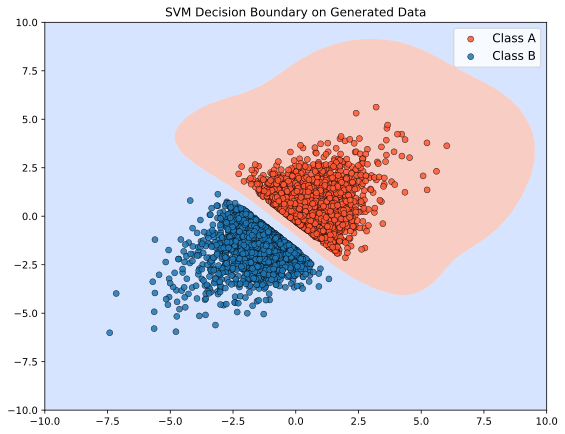

In [874]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 2000
n_B = 2000
margin = 0.5

random_seed = random.randint(0, 1000)
print(f"Using random seed: {random_seed}")
#random_seed = 146

listA, listB = TestLinear(w, b, n_A, n_B, margin, seed=random_seed)

# Convert lists to numpy arrays
X_A = np.array(listA)
X_B = np.array(listB)
X = np.vstack((X_A, X_B))
y = np.hstack((np.ones(n_A), -np.ones(n_B)))  # Class A = +1, Class B = -1

# Train the SVM
svm = SVM(C=1.0, kernel="gaussian", lr=0.01, mode="dual", sigma=1.5, s=1.5, max_iter=5000, tol=1e-4)
%time svm.fit(X, y)

# Predict decision boundary
xx, yy = np.meshgrid(np.linspace(-10, 10, 50), np.linspace(-10, 10, 50))
Z = np.c_[xx.ravel(), yy.ravel()]
preds = svm.predict(Z).reshape(xx.shape)
decision_values = svm._decision_function(Z).reshape(xx.shape)

import pandas as pd
print(pd.Series(decision_values.flatten()).describe())

# Plot the results
plt.figure(figsize=(9, 7))
plt.contourf(xx, yy, decision_values, alpha=0.5, levels=[-100, 0, 100], colors=["#AFCBFF", "#F19C8A"]) # , colors=["#AFCBFF", "#F19C8A"])
# plt.contour(xx, yy, decision_values, levels=[0], linewidths=2, colors="white")
plt.scatter(X_A[:, 0], X_A[:, 1], color="#FF5733", label="Class A", edgecolors="black", linewidth=0.5, alpha=0.85)
plt.scatter(X_B[:, 0], X_B[:, 1], color="#1F77B4", label="Class B", edgecolors="black", linewidth=0.5, alpha=0.85)
plt.legend(frameon=True, fontsize=12, loc="upper right")
plt.title("SVM Decision Boundary on Generated Data")
plt.show()